<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Numerical%20Method/solve%20ordinary%20differential%20equation/Heun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* In this case we'll use this differential equation:
$$ y' = y + x^2 + 1 $$

* this equation has the following exact solution:
$$ y = 4e^x - x^2 + 1$$

* Objective: <br>
we will approximate the exact solution using the **Heun** method.

### Ordinary Differential Equation

In [1]:
def dydx(x, y):
  return y + x**2 + 1

### Heun Method

More details about Heun: http://calculuslab.deltacollege.edu/ODE/7-C-2/7-C-2-h.html

In [2]:
def heun(x, y0, h, dydx):
  N = len(x)
  y = np.zeros(N)
  y[0] = y0
  for i in range(N-1):
    y[i+1] = y[i] + (h/2)*(dydx(x[i], y[i]) + dydx(x[i+1], y[i] + h * dydx(x[i], y[i])))
  return y

### Analytic

In [3]:
def analytic(x):
  
  N = len(x)
  y_analytics = np.array([])

  for i in range(N):
    y_i_analytic = 4*np.exp(x[i]) - x[i]**2 - 2*x[i] - 3
    y_analytics = np.append(y_analytics, y_i_analytic)

  return y_analytics


### Testing on $ N = 10$

In [5]:
import numpy as np

x = np.linspace(0, 10, 10)
y0 = 1
h = 0.05
N = 10
res_analytic = analytic(x)
res_heun = heun(x, y0, h, dydx)

for i in range(N-1):
  print(f'untuk t = {round(x[i], 3)} maka numerik P = {round(res_heun[i], 3)}, analitik P = {round(res_analytic[i], 3)}, error = {round(abs(res_heun[i] - res_analytic[i]), 3)}')

untuk t = 0.0 maka numerik P = 1.0, analitik P = 1.0, error = 0.0
untuk t = 1.111 maka numerik P = 1.133, analitik P = 5.694, error = 4.561
untuk t = 2.222 maka numerik P = 1.399, analitik P = 24.529, error = 23.13
untuk t = 3.333 maka numerik P = 1.929, analitik P = 91.349, error = 89.42
untuk t = 4.444 maka numerik P = 2.864, analitik P = 308.968, error = 306.104
untuk t = 5.556 maka numerik P = 4.353, analitik P = 989.707, error = 985.355
untuk t = 6.667 maka numerik P = 6.548, analitik P = 3082.31, error = 3075.762
untuk t = 7.778 maka numerik P = 9.614, analitik P = 9468.809, error = 9459.195
untuk t = 8.889 maka numerik P = 13.721, analitik P = 28904.042, error = 28890.321


###  Heun and Analytics Comparison Plot 

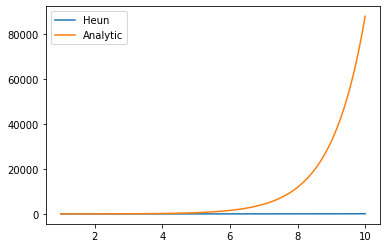

In [6]:
import matplotlib.pyplot as plt
N = 100
a = 1
b = 10
y0 = 1
h = 0.0125
x = np.linspace(a, b, N)

y_heun = heun(x, y0, h, dydx)
y_analytic = analytic(x)

plt.plot(x, y_heun, label="Heun")
plt.plot(x, y_analytic, label = "Analytic")
plt.legend()

plt.show()

### Errors Comparison 

This errors comparison based on $h$ value. In case I use some $h$ values below:
* $h$ = 0.1
* $h$ = 0.05
* $h$ = 0.025
* $h$ = 0.0125

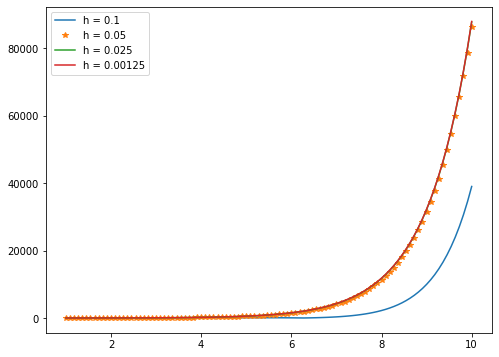

In [7]:
h1 = 0.1  
h2 = 0.05
h3 = 0.025
h4 = 0.0125

y_heun_h1 = heun(x, y0, h1, dydx)
y_heun_h2 = heun(x, y0, h2, dydx)
y_heun_h3 = heun(x, y0, h3, dydx)
y_heun_h4 = heun(x, y0, h4, dydx)

plt.figure(figsize=(8, 6))

plt.plot(x, abs(y_heun_h1 - y_analytic), label="h = 0.1")
plt.plot(x, abs(y_heun_h2 - y_analytic), '*', label="h = 0.05")
plt.plot(x, abs(y_heun_h3 - y_analytic), '-', label="h = 0.025")
plt.plot(x, abs(y_heun_h4 - y_analytic), label="h = 0.00125")

plt.legend()
plt.show()